In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
insta_train  =pd.read_csv('insta_train.csv')
insta_train
insta_test  =pd.read_csv('insta_test.csv')
insta_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [ ]:
print("Basic Statistics (Train Data):\n", insta_train.describe())

Basic Statistics (Train Data):
        profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean      0.701389              0.163837        1.460069   
std       0.458047              0.214096        1.052601   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.310000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length  external URL  \
count            576.000000      576.000000          576.000000    576.000000   
mean               0.036094        0.034722           22.623264      0.116319   
std                0.125121        0.183234           37.702987      0.320886   
min                0.000000        0.000000            0.000000      0.000000   
25%                0.0

<ipython-input-4-b91c9a142b91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake', data=insta_train, palette='viridis')


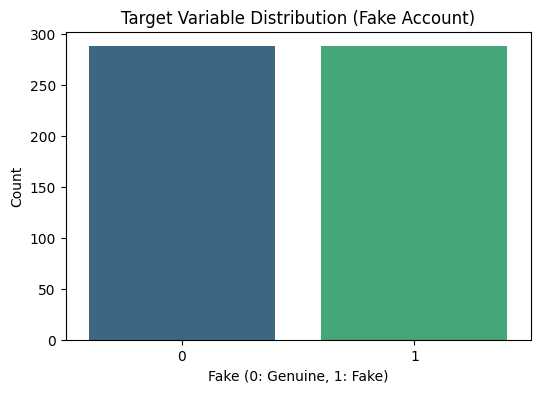

In [ ]:
# 2. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='fake', data=insta_train, palette='viridis')
plt.title('Target Variable Distribution (Fake Account)')
plt.xlabel('Fake (0: Genuine, 1: Fake)')
plt.ylabel('Count')
plt.show()

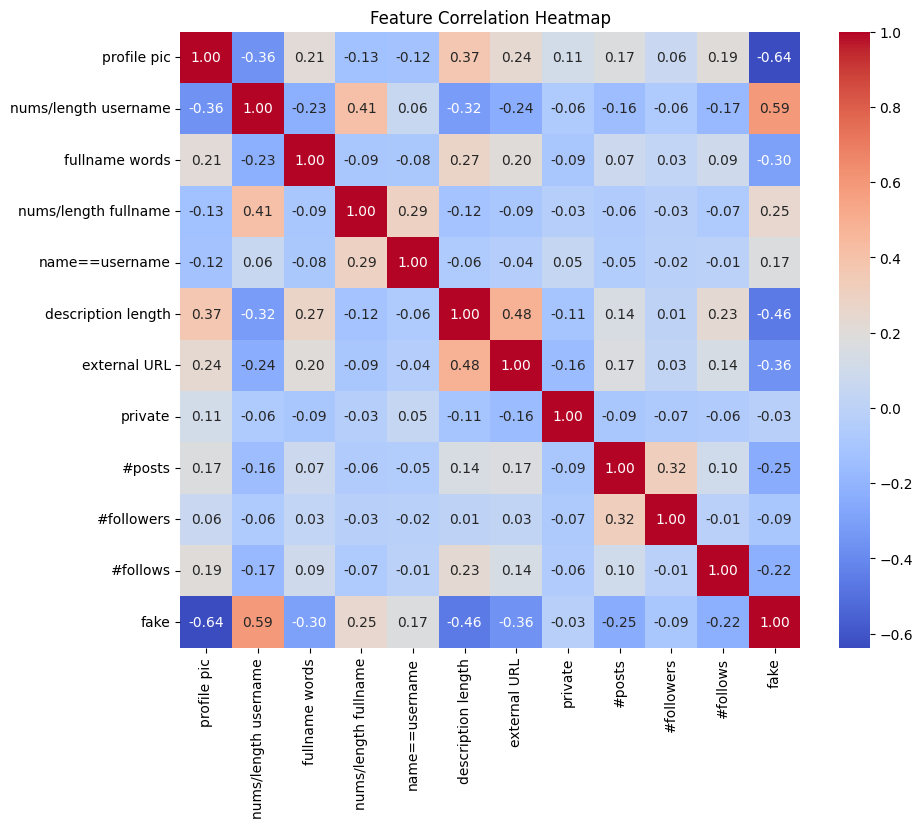

In [ ]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = insta_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


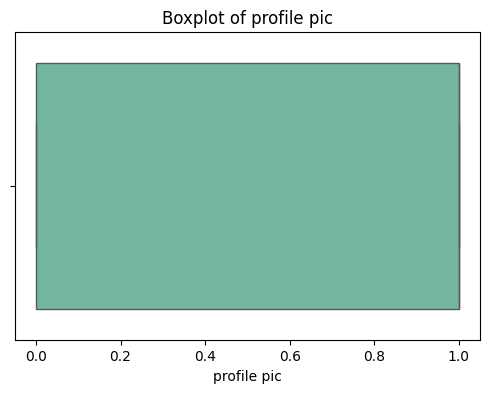

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


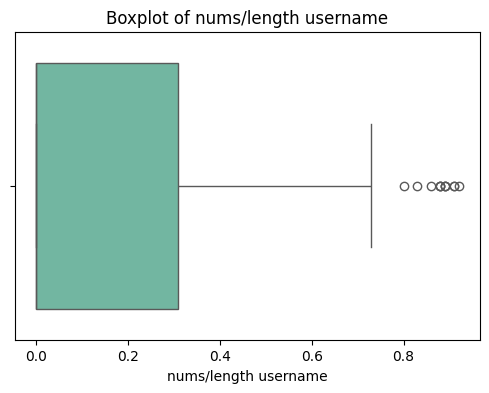

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


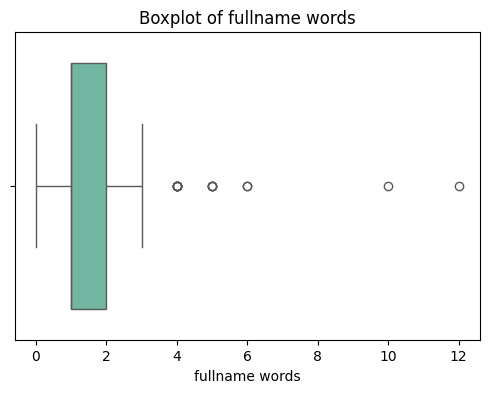

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


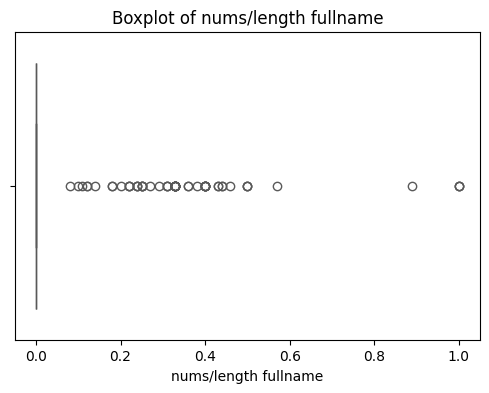

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


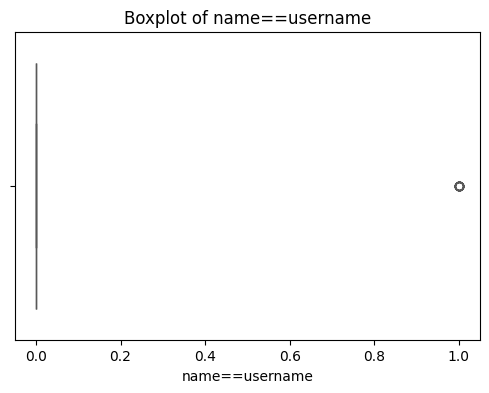

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


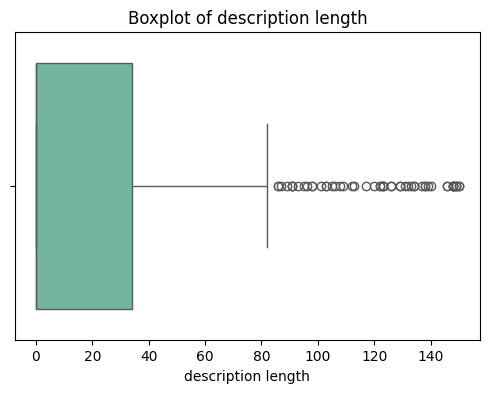

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


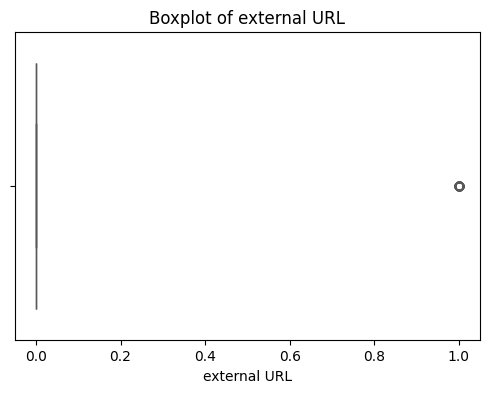

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


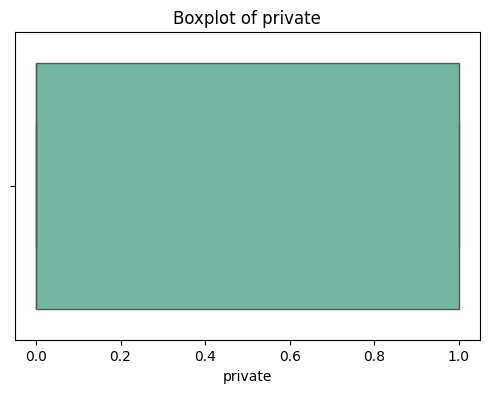

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


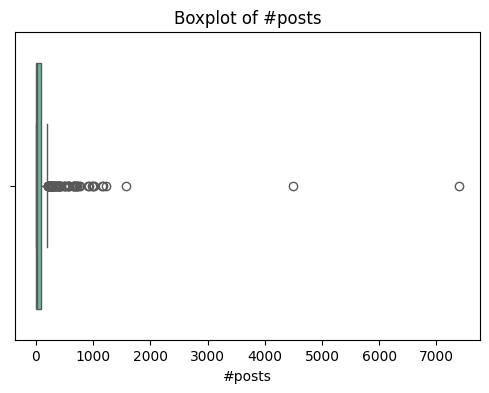

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


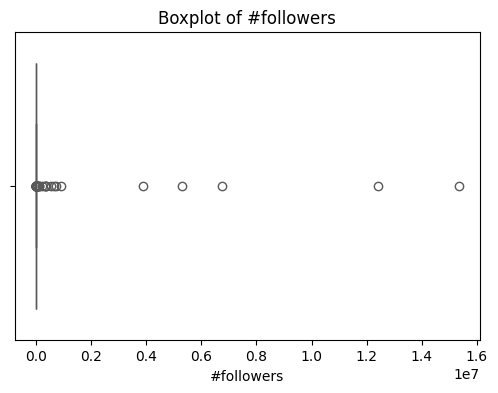

<ipython-input-6-31a81534a048>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insta_train[feature], palette='Set2')


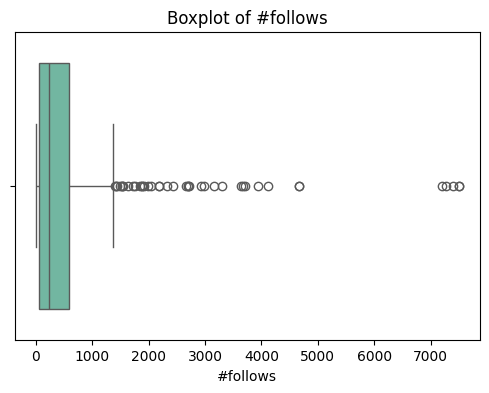

In [ ]:
# 4. Boxplots for Outlier Detection
numeric_features = insta_train.select_dtypes(include=['float64', 'int64']).columns.drop('fake')
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=insta_train[feature], palette='Set2')
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [ ]:
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Remove outliers in training data
insta_train_cleaned = remove_outliers(insta_train, numeric_features)

print("Shape before outlier removal:", insta_train.shape)
print("Shape after outlier removal:", insta_train_cleaned.shape)

Shape before outlier removal: (576, 12)
Shape after outlier removal: (298, 12)


In [ ]:
X_train = insta_train_cleaned.drop(columns=['fake'])
y_train = insta_train_cleaned['fake']

X_test = insta_test.drop(columns=['fake'])
y_test = insta_test['fake']


In [ ]:
# Normalize features for RNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN (samples, timesteps, features)
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [ ]:
# --------- Build and Train RNN ---------
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train_rnn, y_train, epochs=20, batch_size=16, validation_data=(X_test_rnn, y_test), verbose=1)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7162 - loss: 0.6791 - val_accuracy: 0.4667 - val_loss: 11.4261
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6842 - loss: 0.6631 - val_accuracy: 0.4583 - val_loss: 6.4692
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6495 - loss: 0.6425 - val_accuracy: 0.5917 - val_loss: 1.9454
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7421 - loss: 0.5928 - val_accuracy: 0.7083 - val_loss: 0.6016
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7789 - loss: 0.5609 - val_accuracy: 0.7583 - val_loss: 0.5770
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8026 - loss: 0.5444 - val_accuracy: 0.7750 - val_loss: 0.5566
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8516 - loss: 0.5009 - val_accuracy: 0.8083 - val_loss: 0.5374
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8784 - loss: 0.4594 - val_accuracy: 0.8167 - val_los

In [ ]:
# --------- Evaluate the Model ---------
# Predict on test data
y_pred = (model.predict(X_test_rnn) > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [ ]:
# Evaluate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


--- Model Evaluation ---
Accuracy: 0.8583333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        60
           1       0.91      0.80      0.85        60

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120



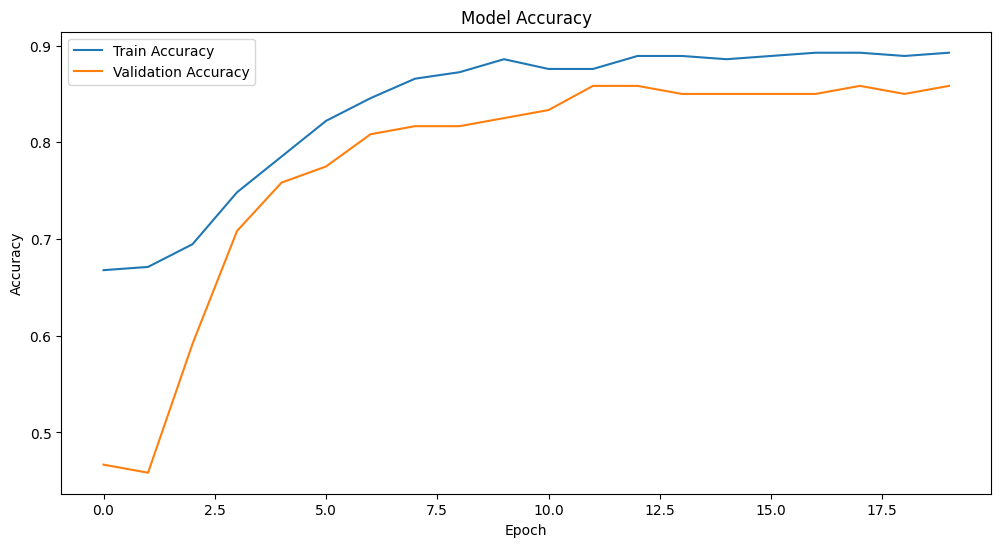

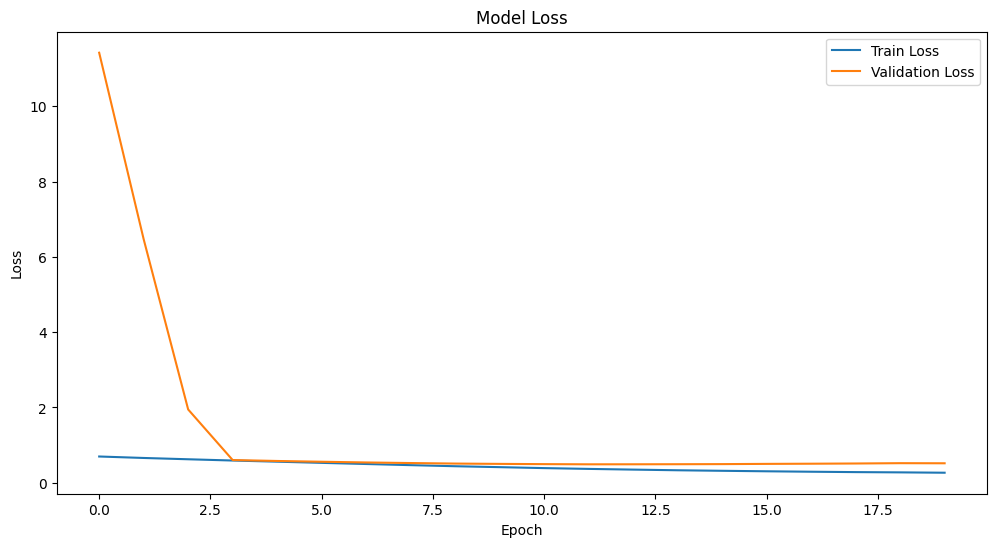

In [ ]:
# --------- Plot Training History ---------
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()